# Chemical Potential Overlap Descriptor Example
*October 28, 2025*

This notebook demonstrates how to use `pytheos` to extract chemical potential diagrams from the [Materials Project](https://next-gen.materialsproject.org/) database. In this example we will be exploring the rocksalt high-entropy oxide systems investigated in our Nature Communications publication where we introduced this descriptor: [Thermodynamics-Inspired High-Entropy Oxide Synthesis](https://www.nature.com/articles/s41467-025-63567-z).

For more information on how these chemical potential diagrams are constructed, as well as the logic behind our developed chemical potential overlap descriptor for HEO discovery, please see Chapter 6 of my dissertation [(Link)](https://etda.libraries.psu.edu/catalog/21095jts6114). The following is a schematic taken from my dissertation showing how chemical potential diagrams are created from convex hulls:

<div>
<img src="./chempot_diagram_schematic.png" width="850"/>
</div>

## MgO

In [1]:
from pytheos.stability import materials_project, phase_diagram, chemical_potential

# good practice to ensure data can be reproduced in the future since entries can change within the database
materials_project.get_db_version()

'2025.09.25'

In [ ]:
# we will start by just going over this process for rocksalt MgO
Mg_O_entries = materials_project.query_entries_across_chemsys(
    elements=["Mg", "O"], 
    api_key="YOUR_API_KEY",
    thermo_type="GGA_GGA+U",
    )
print(f"{len(Mg_O_entries)} entries found across the Mg-O chemical system for GGA/GGA+U Materials Project.")

Retrieving ThermoDoc documents:   0%|          | 0/58 [00:00<?, ?it/s]

58 entries found across the Mg-O chemical system for GGA/GGA+U Materials Project.


In [3]:
# now let's create a phase diagram using these entries
Mg_O_pd = phase_diagram.generate_phase_diagram(entries=Mg_O_entries)
print(Mg_O_pd)

Mg-O phase diagram
3 stable phases: 
Mg, MgO, O2


As expected for the Mg-O chemical system, we only have three stable phases: elemental Magnesium and Oxygen, and rocksalt MgO

In [4]:
MgO_chempot = chemical_potential.ChemPotDiagram(
    phase_diagram=Mg_O_pd,
    cation="Mg",
    anion="O", # built so this class can be used for other ceramic materials such as nitrides/carbides
    target_compound="MgO",
)
print(MgO_chempot.__dict__)

{'phase_diagram': Mg-O phase diagram
3 stable phases: 
Mg, MgO, O2, 'target_compound': 'MgO', 'cation': 'Mg', 'anion': 'O', 'all_stable_ranges': None, 'target_ranges': None, 'target_anion_range': None, 'diagram': None}


In [5]:
# first let's extract all chemical potential ranges for our chemical potential diagram we constructed
MgO_chempot.get_all_stable_ranges()

,formula,Mg (eV),O (eV)
0,O,-50.000000,0.000000
1,MgO,-6.106808,0.000000
2,O,-6.106808,0.000000
3,MgO,0.000000,-6.106808
4,Mg,0.000000,-6.106808
5,Mg,0.000000,-50.000000


In [6]:
# now we can extract just our target anion range for which our target compound specified earlier is stable
MgO_stable_oxygen_chempot_range = MgO_chempot.get_target_anion_range()

print(f"Minimum: \t{MgO_stable_oxygen_chempot_range["min"]:.3f} eV")
print(f"Maximum: \t{MgO_stable_oxygen_chempot_range["max"]:.3f} eV")
print(f"Distance: \t{MgO_stable_oxygen_chempot_range["distance"]:.3f} eV")

Minimum: 	-6.107 eV
Maximum: 	0.000 eV
Distance: 	6.107 eV


As we can see, this matches the output of the `get_all_stable_ranges()` for our target compound of MgO along the oxygen chemical potential axis. These modules of the `ChemPotDiagram` class within `pytheos` are extremely useful to automate this process and explore a significant amount of compositions in a high-throughput manner.

***Notice that the chemical potential diagrams are only sensitive to the stoichiometry, not the structure for a given composition...***

Now let's visualize this Mg-O chemical potential diagram:

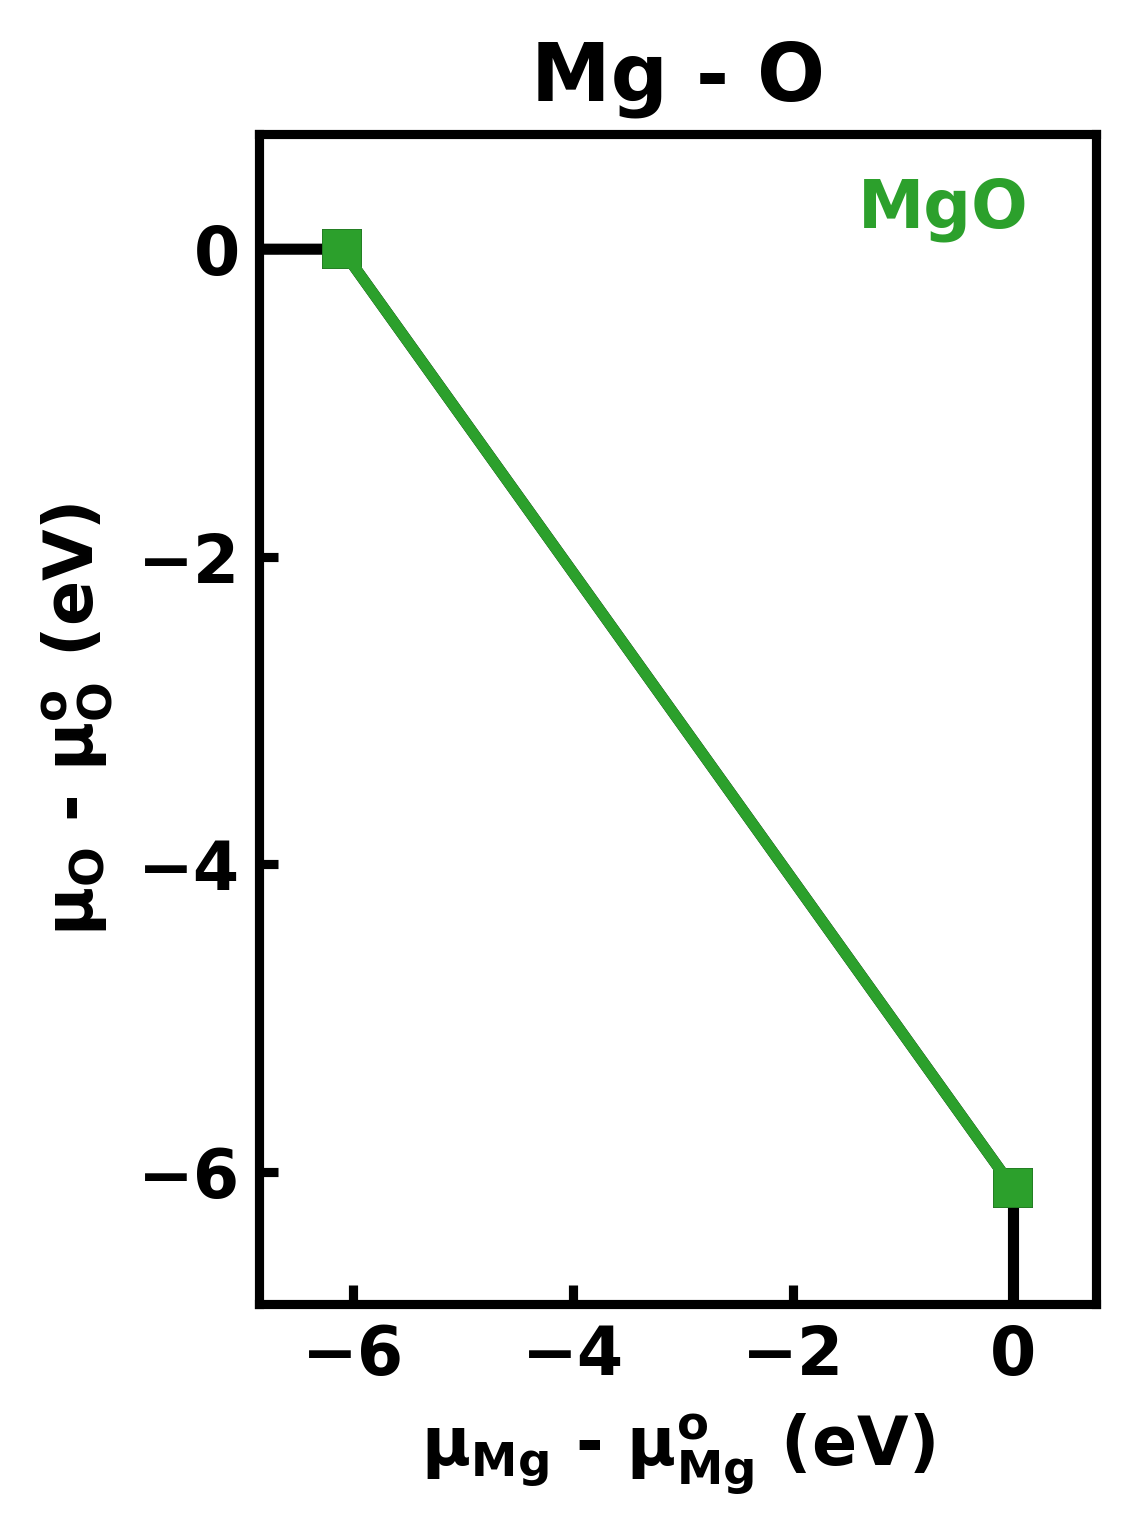

<Figure size 1200x1600 with 0 Axes>

In [7]:
MgO_chempot.plot_diagram(
    with_target=True # highlights the targeted composition in green for easier visualization
    )

## CoO
Now let's take a look at a bit more complicated chemical potential diagram for the Co-O chemical system that has multiple stable oxide compounds.

I will go less step-by-step here since I already walked through each of these with Mg-O above...

In [ ]:
Co_O_entries = materials_project.query_entries_across_chemsys(
    elements=["Co", "O"], 
    api_key="YOUR_API_KEY",
    thermo_type="GGA_GGA+U",
    )
print(f"{len(Co_O_entries)} entries found across the Co-O chemical system for GGA/GGA+U Materials Project.\n")

Co_O_pd = phase_diagram.generate_phase_diagram(entries=Co_O_entries)
print(Co_O_pd)

CoO_chempot = chemical_potential.ChemPotDiagram(
    phase_diagram=Co_O_pd,
    cation="Co",
    anion="O",
    target_compound="CoO",
)

Retrieving ThermoDoc documents:   0%|          | 0/89 [00:00<?, ?it/s]

89 entries found across the Co-O chemical system for GGA/GGA+U Materials Project.

Co-O phase diagram
6 stable phases: 
Co3O4, O2, CoO2, CoO, Co, Co23O32


In [10]:
CoO_chempot.get_all_stable_ranges()

,formula,Co (eV),O (eV)
0,O,-50.000000,0.000000
1,CoO2,-3.242397,0.000000
2,O,-3.242397,0.000000
3,CoO2,-2.672728,-0.284834
4,Co23O32,-2.672728,-0.284834
5,Co3O4,-2.273869,-0.571514
6,Co23O32,-2.273869,-0.571514
7,CoO,-1.167381,-1.401381
8,Co3O4,-1.167381,-1.401381
9,CoO,0.000000,-2.568761


In [11]:
# now we can extract just our target anion range for which our target compound specified earlier is stable
CoO_stable_oxygen_chempot_range = CoO_chempot.get_target_anion_range()

print(f"Minimum: \t{CoO_stable_oxygen_chempot_range["min"]:.3f} eV")
print(f"Maximum: \t{CoO_stable_oxygen_chempot_range["max"]:.3f} eV")
print(f"Distance: \t{CoO_stable_oxygen_chempot_range["distance"]:.3f} eV")

Minimum: 	-2.569 eV
Maximum: 	-1.401 eV
Distance: 	1.167 eV


Notice that CoO has a narrower "window" compared to MgO within oxygen chemical potential space due to the addition oxide compositions that are stable along the convex hull.

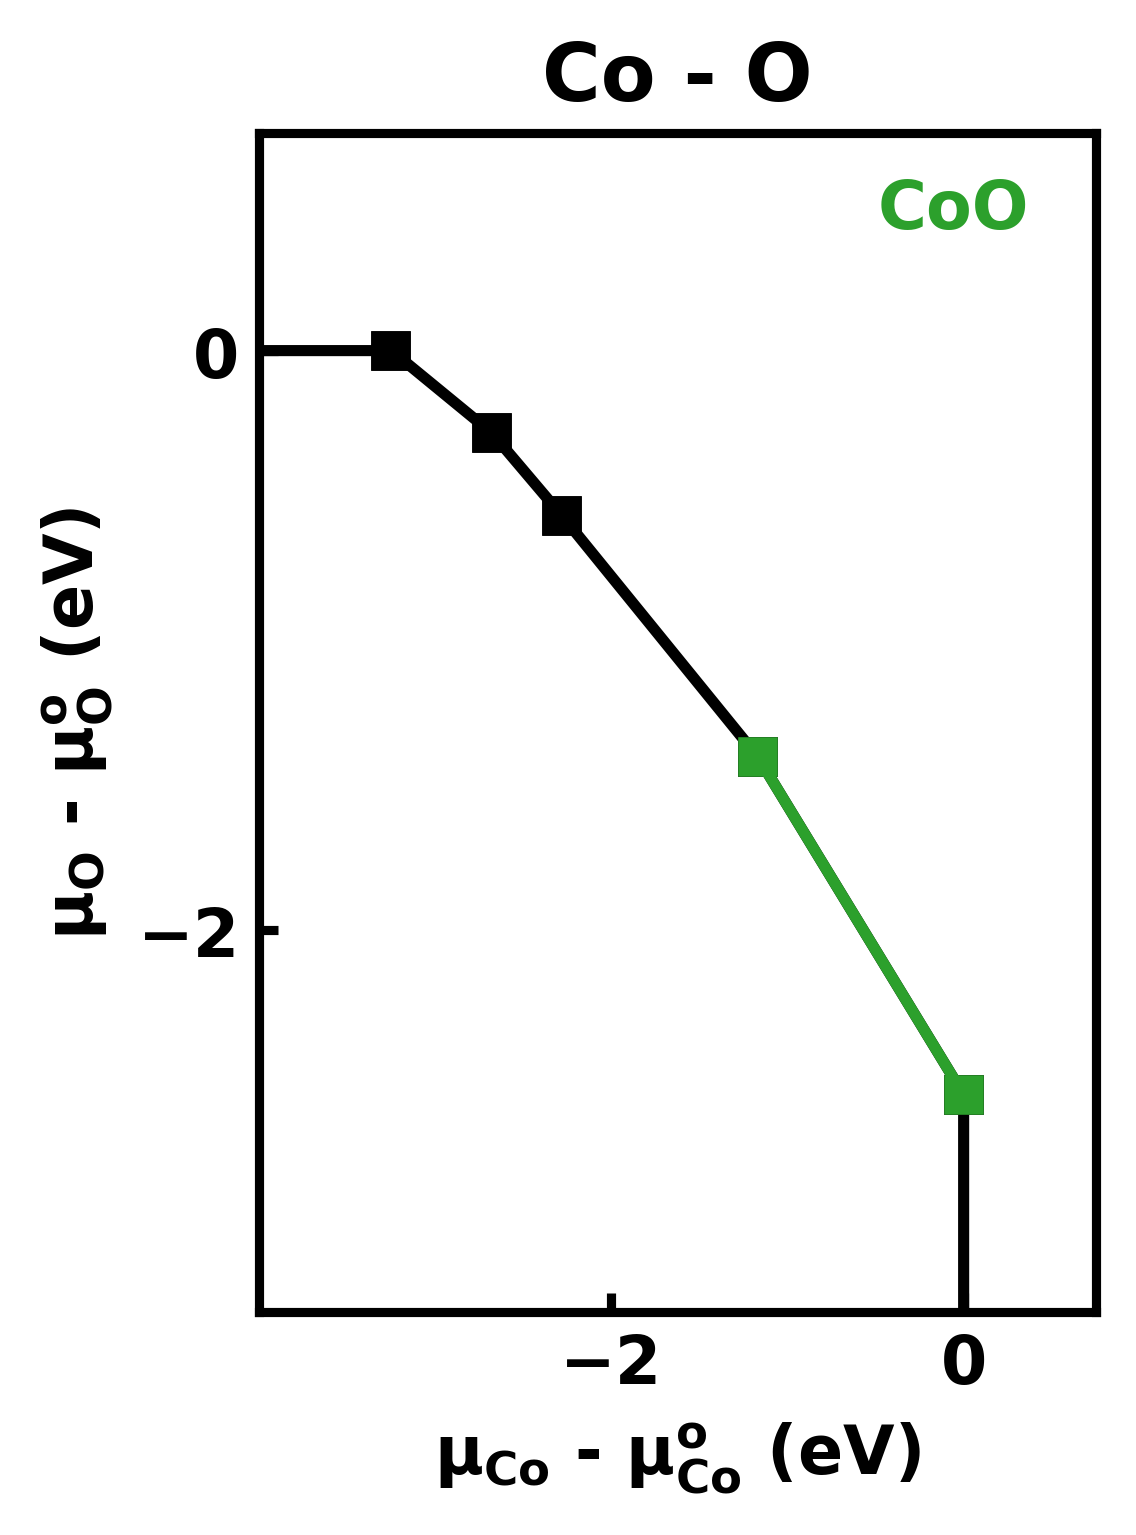

<Figure size 1200x1600 with 0 Axes>

In [12]:
CoO_chempot.plot_diagram(with_target=True)

## Computing the Chemical Potential Overlap Descriptor ($\mu_{overlap}$)

We can use the stable oxygen chemical potential ranges to compute what we have called the "chemical potential overlap descriptor", or $\mu_{overlap}$. This is inspired by Yokokawa's 1999 article on the [Generalized chemical potential diagram and its applications to chemical reactions at interfaces between dissimilar materials](https://doi.org/10.1361/105497199770335794), where the separation and overlap of stable oxygen chemical potential windows are used to explain (in)solubility of different oxide compositions.

This novel computational descriptor provides a simple and extremely computationally cheap route to evaluating the cation valence compatibility within ceramic materials, which we utilize primarily for high-entropy oxide discovery. A negative value indicates separation in the stable oxygen chemical potential space, while a positive value indicates overlap in the stable oxygen chemical potential space.

For more details on how this descriptor is computed, please see the following Nature Communication publication: [Thermodynamics-Inspired High-Entropy Oxide Synthesis](https://www.nature.com/articles/s41467-025-63567-z).

In [ ]:
# let's go through all of the cations explored for rocksalt HEOs in our publication: Mg, Ca, Mn, Fe, Co, Ni, Cu, Zn
import pandas as pd

cation_cohort = ["Mg", "Ca", "Mn", "Fe", "Co", "Ni", "Cu", "Zn"]
AO_stable_ranges = {}

for cation in cation_cohort:
    
    print(f"=== {cation}-O ===")

    entries = materials_project.query_entries_across_chemsys(
    elements=[cation, "O"], 
    api_key="YOUR_API_KEY",
    thermo_type="GGA_GGA+U",
    )
    print(f"{len(entries)} entries found across the GGA/GGA+U Materials Project database.\n")

    phasediagram = phase_diagram.generate_phase_diagram(entries=entries)

    chempot = chemical_potential.ChemPotDiagram(
        phase_diagram=phasediagram,
        cation=cation,
        anion="O",
        target_compound=f"{cation}O",
    )

    chempot.get_all_stable_ranges()

    AO_stable_range = chempot.get_target_anion_range()
    
    AO_stable_ranges[f"{cation}O"] = (AO_stable_range["min"], AO_stable_range["max"])

print(pd.DataFrame(AO_stable_ranges))

=== Mg-O ===


Retrieving ThermoDoc documents:   0%|          | 0/58 [00:00<?, ?it/s]

58 entries found across the GGA/GGA+U Materials Project database.

=== Ca-O ===


Retrieving ThermoDoc documents:   0%|          | 0/49 [00:00<?, ?it/s]

49 entries found across the GGA/GGA+U Materials Project database.

=== Mn-O ===


Retrieving ThermoDoc documents:   0%|          | 0/96 [00:00<?, ?it/s]

96 entries found across the GGA/GGA+U Materials Project database.

=== Fe-O ===


Retrieving ThermoDoc documents:   0%|          | 0/169 [00:00<?, ?it/s]

169 entries found across the GGA/GGA+U Materials Project database.

=== Co-O ===


Retrieving ThermoDoc documents:   0%|          | 0/89 [00:00<?, ?it/s]

89 entries found across the GGA/GGA+U Materials Project database.

=== Ni-O ===


Retrieving ThermoDoc documents:   0%|          | 0/64 [00:00<?, ?it/s]

64 entries found across the GGA/GGA+U Materials Project database.

=== Cu-O ===


Retrieving ThermoDoc documents:   0%|          | 0/68 [00:00<?, ?it/s]

68 entries found across the GGA/GGA+U Materials Project database.

=== Zn-O ===


Retrieving ThermoDoc documents:   0%|          | 0/48 [00:00<?, ?it/s]

48 entries found across the GGA/GGA+U Materials Project database.

        MgO       CaO       MnO       FeO       CoO       NiO       CuO  \
0 -6.106808 -6.612039 -3.958402 -2.963039 -2.568761 -2.436171 -1.837663   
1  0.000000 -0.007642 -2.477657 -2.609379 -1.401381 -0.018739 -0.394465   

        ZnO  
0 -3.581798  
1  0.000000  


Which correspond to the following chemical potential diagrams...

<div>
<img src="./chempot_diagram_AO.png" width="1200"/>
</div>

Now that we have the stable oxygen chemical potential ranges for each of our cations, we can start to compute the 2-cation chemical potential overlap ($\mu_{overlap}$)

In [ ]:
from itertools import combinations

combos_2cation = list(combinations(cation_cohort, 2))
print(f"There are {len(combos_2cation)} 2-cation combinations for our cation cohort:\n{combos_2cation}\n\n")

chempot_overlaps_2cation = {
    "combo": [],
    "overlap (eV)": [],
}

for combo in combos_2cation:

    range1 = AO_stable_ranges[f"{combo[0]}O"]
    range2 = AO_stable_ranges[f"{combo[1]}O"]

    overlap_dict = chemical_potential.calc_overlap(ranges=(range1, range2))

    chempot_overlaps_2cation["combo"].append(f"{combo[0]}{combo[1]}")
    chempot_overlaps_2cation["overlap (eV)"].append(overlap_dict["overlap"])

print(pd.DataFrame(chempot_overlaps_2cation))

There are 28 2-cation combinations for our cation cohort:
[('Mg', 'Ca'), ('Mg', 'Mn'), ('Mg', 'Fe'), ('Mg', 'Co'), ('Mg', 'Ni'), ('Mg', 'Cu'), ('Mg', 'Zn'), ('Ca', 'Mn'), ('Ca', 'Fe'), ('Ca', 'Co'), ('Ca', 'Ni'), ('Ca', 'Cu'), ('Ca', 'Zn'), ('Mn', 'Fe'), ('Mn', 'Co'), ('Mn', 'Ni'), ('Mn', 'Cu'), ('Mn', 'Zn'), ('Fe', 'Co'), ('Fe', 'Ni'), ('Fe', 'Cu'), ('Fe', 'Zn'), ('Co', 'Ni'), ('Co', 'Cu'), ('Co', 'Zn'), ('Ni', 'Cu'), ('Ni', 'Zn'), ('Cu', 'Zn')]


   combo  overlap (eV)
0   MgCa      6.099167
1   MgMn      1.480745
2   MgFe      0.353660
3   MgCo      1.167381
4   MgNi      2.417432
5   MgCu      1.443198
6   MgZn      3.581798
7   CaMn      1.480745
8   CaFe      0.353660
9   CaCo      1.167381
10  CaNi      2.417432
11  CaCu      1.443198
12  CaZn      3.574157
13  MnFe      0.353660
14  MnCo      0.091104
15  MnNi     -0.041487
16  MnCu     -0.639994
17  MnZn      1.104141
18  FeCo     -0.040618
19  FeNi     -0.173209
20  FeCu     -0.771716
21  FeZn      0.353660
22  CoNi      1.03